# Bengali Dataset for Speech Emotion Detection

This is a bengali speech emotion dataset, total 20 people contributed to this dataset. This is a basic EDA of this bengali speech emotion dataset where an audio classification is also included. Any suggestions will be appreciated.

In [1]:
import pandas as pd
import numpy as np

import os
import sys
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

2024-04-24 05:58:15.357405: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 05:58:15.357503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 05:58:15.494769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Dataset Observation

In [2]:
# Define the paths to the data directories
BASER_DIR = Path('/kaggle/input/baser-dataset/BASER_DATASET')
SUBESCO_DIR = Path('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO')


# data_path = list(BASER_DIR.glob('*.wav'))
filepaths = list(SUBESCO_DIR.glob('*.wav'))



In [3]:
# data_path[:10]

In [4]:
filepaths[:10]

[PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_09_SHUMANTA_S_10_FEAR_2.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/F_09_CHAITY_S_3_FEAR_5.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_01_BASHIR_S_8_SURPRISE_2.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_04_BIBHAS_S_8_ANGRY_2.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/F_07_TITHI_S_1_ANGRY_2.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/F_04_SWARNALI_S_4_NEUTRAL_2.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_05_DURANTO_S_3_ANGRY_5.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_10_EVAN_S_3_FEAR_4.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_07_SIBLY_S_10_SAD_4.wav'),
 PosixPath('/kaggle/input/subescobangla-speech-emotion-dataset/SUBESCO/M_07_SIB

In [5]:
# identify emotions from the baser dataset
audio_files = [path.name for path in filepaths]


contributor_name = [item.split("_")[2] for item in audio_files]
emotion_label = [filename.split("_")[5] for filename in audio_files]

In [6]:
print(set(emotion_label))

{'FEAR', 'ANGRY', 'SURPRISE', 'NEUTRAL', 'HAPPY', 'DISGUST', 'SAD'}


In [7]:
# Total Number of Contributors and Types of emotions in the audio files
unique = set(contributor_name)
type_of_emotions = set(emotion_label)

print(f"There are total {len(unique)} numbers of people contributed in this dataset for {len(type_of_emotions)} different emotions")

There are total 20 numbers of people contributed in this dataset for 7 different emotions


In [8]:
# appending emotion_label for the audio dataframe
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
contributor_label = pd.Series(contributor_name, name='Contributor')
labels = pd.Series(emotion_label, name='Label')


audio_df = pd.concat([filepaths, contributor_label,  labels], axis=1)
audio_df['Index'] = audio_df.index
print(audio_df)

                                               Filepath Contributor     Label  \
0     /kaggle/input/subescobangla-speech-emotion-dat...    SHUMANTA      FEAR   
1     /kaggle/input/subescobangla-speech-emotion-dat...      CHAITY      FEAR   
2     /kaggle/input/subescobangla-speech-emotion-dat...      BASHIR  SURPRISE   
3     /kaggle/input/subescobangla-speech-emotion-dat...      BIBHAS     ANGRY   
4     /kaggle/input/subescobangla-speech-emotion-dat...       TITHI     ANGRY   
...                                                 ...         ...       ...   
6995  /kaggle/input/subescobangla-speech-emotion-dat...      PRASUN     HAPPY   
6996  /kaggle/input/subescobangla-speech-emotion-dat...       OISHI     HAPPY   
6997  /kaggle/input/subescobangla-speech-emotion-dat...      MONIKA       SAD   
6998  /kaggle/input/subescobangla-speech-emotion-dat...      CHAITY     ANGRY   
6999  /kaggle/input/subescobangla-speech-emotion-dat...     DURANTO  SURPRISE   

      Index  
0         0  

In [9]:
audio_df.sample(10)

Filepath Contributor     Label  \
4859  /kaggle/input/subescobangla-speech-emotion-dat...      BASHIR      FEAR   
6175  /kaggle/input/subescobangla-speech-emotion-dat...       SIBLY   DISGUST   
1189  /kaggle/input/subescobangla-speech-emotion-dat...      MONIKA   DISGUST   
5262  /kaggle/input/subescobangla-speech-emotion-dat...        SIMI   DISGUST   
5395  /kaggle/input/subescobangla-speech-emotion-dat...    SHUMANTA   NEUTRAL   
4554  /kaggle/input/subescobangla-speech-emotion-dat...    SWARNALI  SURPRISE   
6661  /kaggle/input/subescobangla-speech-emotion-dat...      PRASUN   NEUTRAL   
2841  /kaggle/input/subescobangla-speech-emotion-dat...      MONIKA   NEUTRAL   
1732  /kaggle/input/subescobangla-speech-emotion-dat...       MOUNI   NEUTRAL   
230   /kaggle/input/subescobangla-speech-emotion-dat...      CHAITY   NEUTRAL   

      Index  
4859   4859  
6175   6175  
1189   1189  
5262   5262  
5395   5395  
4554   4554  
6661   6661  
2841   2841  
1732   1732  
230     230

# Dataset Visualization

<Axes: xlabel='Label', ylabel='Count'>

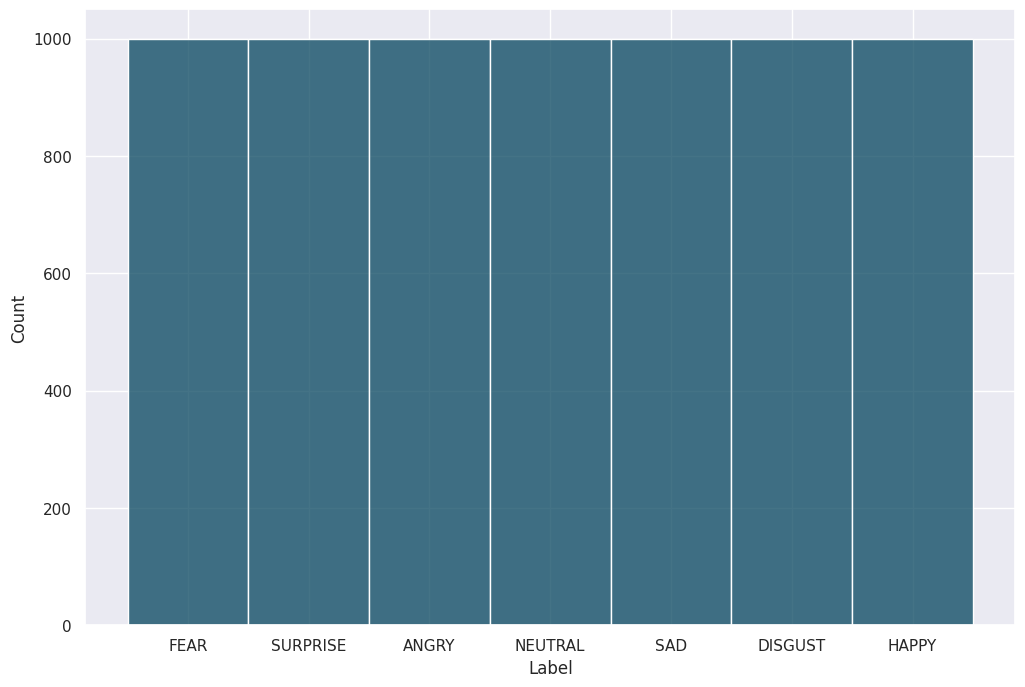

In [10]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#05445E')

In [11]:
audio_arrays = []

for i in audio_df['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
audio_df['Arrays'] = audio_arrays

In [12]:
audio_df

Filepath Contributor     Label  \
0     /kaggle/input/subescobangla-speech-emotion-dat...    SHUMANTA      FEAR   
1     /kaggle/input/subescobangla-speech-emotion-dat...      CHAITY      FEAR   
2     /kaggle/input/subescobangla-speech-emotion-dat...      BASHIR  SURPRISE   
3     /kaggle/input/subescobangla-speech-emotion-dat...      BIBHAS     ANGRY   
4     /kaggle/input/subescobangla-speech-emotion-dat...       TITHI     ANGRY   
...                                                 ...         ...       ...   
6995  /kaggle/input/subescobangla-speech-emotion-dat...      PRASUN     HAPPY   
6996  /kaggle/input/subescobangla-speech-emotion-dat...       OISHI     HAPPY   
6997  /kaggle/input/subescobangla-speech-emotion-dat...      MONIKA       SAD   
6998  /kaggle/input/subescobangla-speech-emotion-dat...      CHAITY     ANGRY   
6999  /kaggle/input/subescobangla-speech-emotion-dat...     DURANTO  SURPRISE   

      Index                                             Arrays  
0         0  [-1.7871584e-05, 2.4669329e-05, -2.1359305e-05...  
1         1  [0.0, -3.0517578e-05, 3.0517578e-05, 0.0, 0.0,...  
2         2  [-0.00076293945, -0.000579834, -0.0007019043, ...  
3         3  [0.0, 0.0, -3.0517578e-05, 6.1035156e-05, -6.1...  
4         4  [-3.0010207e-05, 1.4404775e-05, -5.63261e-07, ...  
...     ...                                                ...  
6995   6995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0517578e-05, ...  
6996   6996  [-0.0015563965, -0.0012817383, -0.0014038086, ...  
6997   6997  [-0.002380371, -0.0027160645, -0.0024108887, -...  
6998   6998  [0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05, 6.10...  
6999   6999  [0.0, 0.0, 0.0, 0.0, 0.0, -3.0517578e-05, 9.15...  

[7000 rows x 5 columns]

# ANGRY

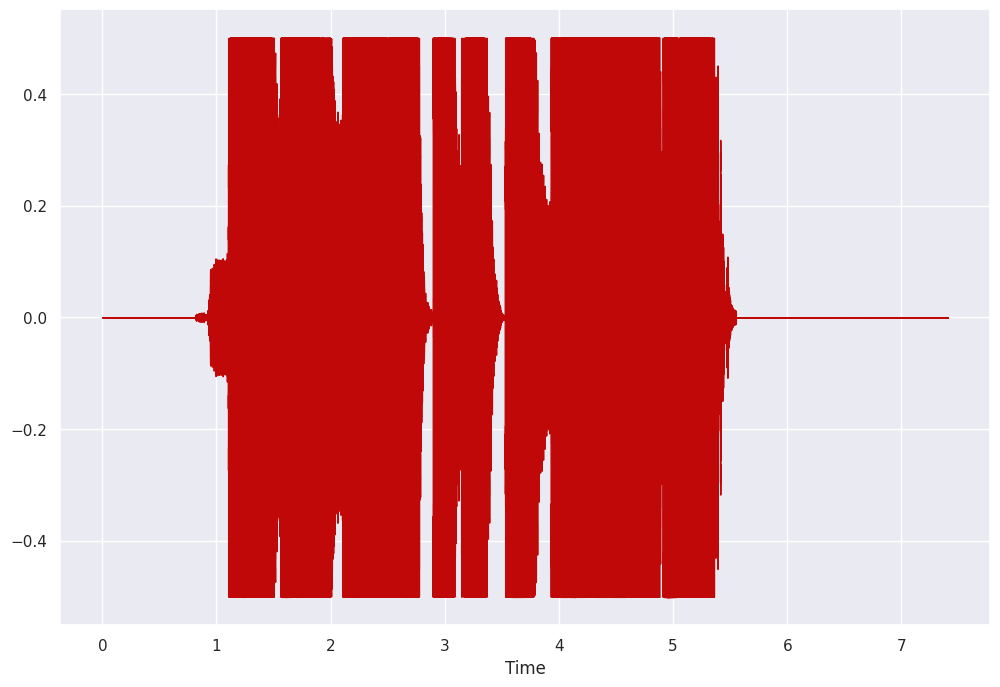

In [13]:
angry = audio_df[audio_df['Label'] == 'ANGRY']['Filepath']
angryarray = audio_df[audio_df['Label'] == 'ANGRY']['Arrays']

librosa.display.waveshow(angryarray.iloc[0], color='#C00808')
IPython.display.Audio(angry.iloc[0])

# FEAR

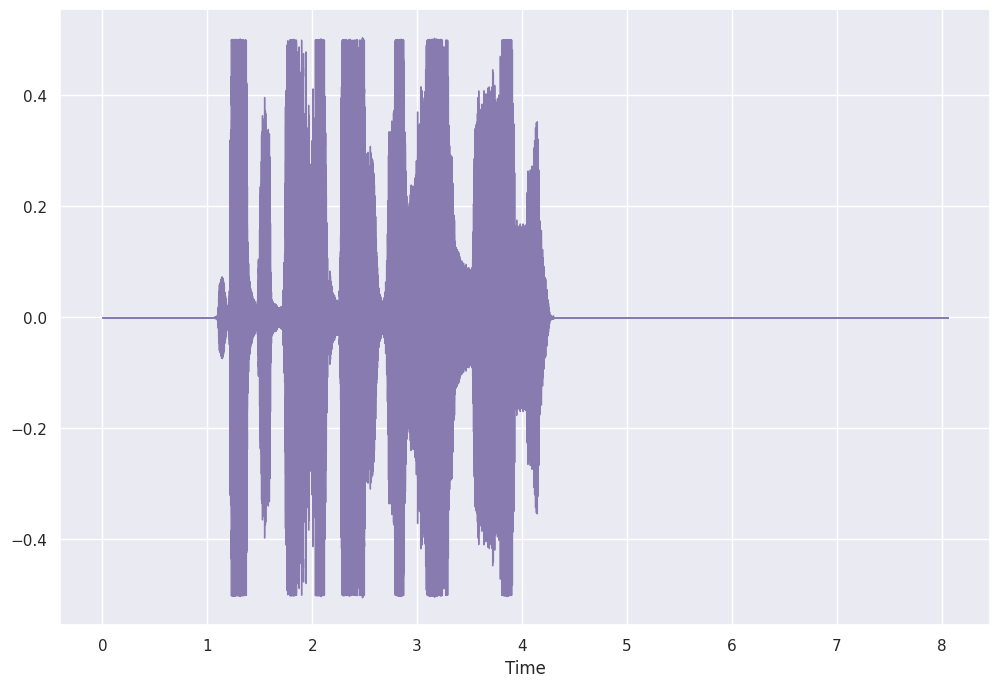

In [14]:
fear = audio_df[audio_df['Label'] == 'FEAR']['Filepath']
feararray = audio_df[audio_df['Label'] == 'FEAR']['Arrays']

librosa.display.waveshow(feararray.iloc[0], color='#887BB0')
IPython.display.Audio(fear.iloc[0])

# SURPRISE

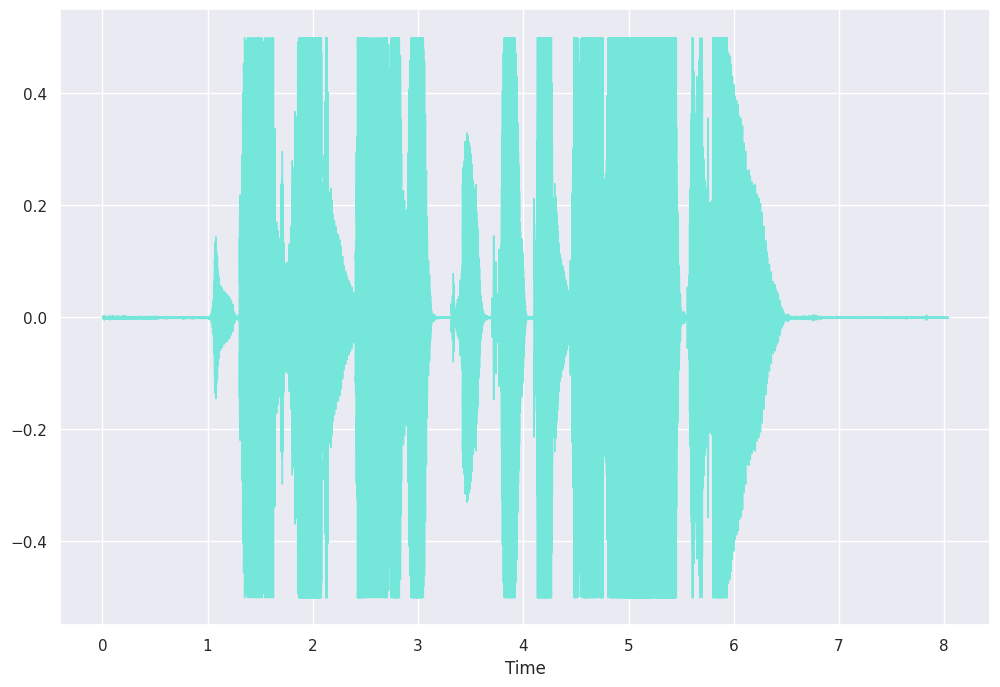

In [15]:
surprise = audio_df[audio_df['Label'] == 'SURPRISE']['Filepath']
surprisearray = audio_df[audio_df['Label'] == 'SURPRISE']['Arrays']

librosa.display.waveshow(surprisearray.iloc[0], color='#75E6DA')
IPython.display.Audio(surprise.iloc[0])

# SAD

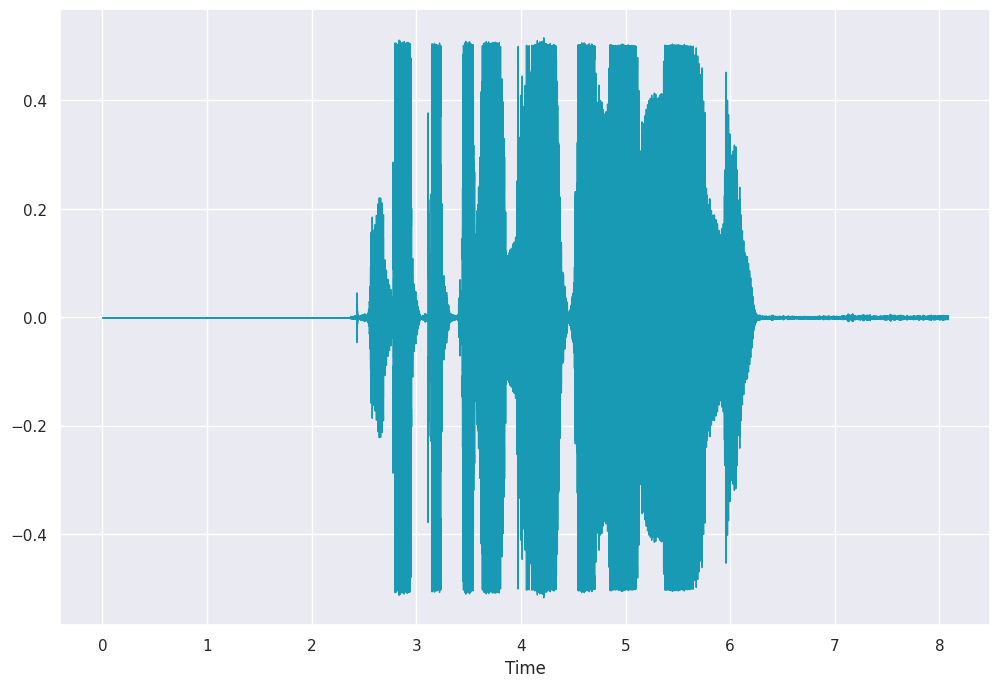

In [16]:
sad = audio_df[audio_df['Label'] == 'SAD']['Filepath']
sadarray = audio_df[audio_df['Label'] == 'SAD']['Arrays']

librosa.display.waveshow(sadarray.iloc[0], color='#189AB4')
IPython.display.Audio(sad.iloc[0])

# DISGUST

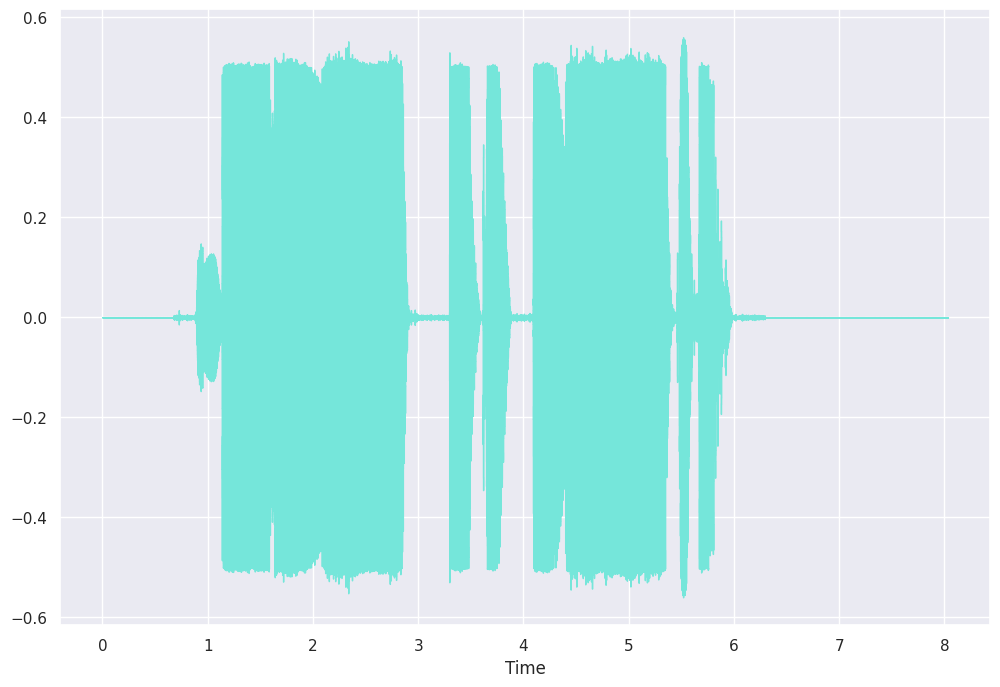

In [17]:
disgust = audio_df[audio_df['Label'] == 'DISGUST']['Filepath']
disgustarray = audio_df[audio_df['Label'] == 'DISGUST']['Arrays']

librosa.display.waveshow(disgustarray.iloc[0], color='#75E6DA')
IPython.display.Audio(disgust.iloc[0])

# HAPPY

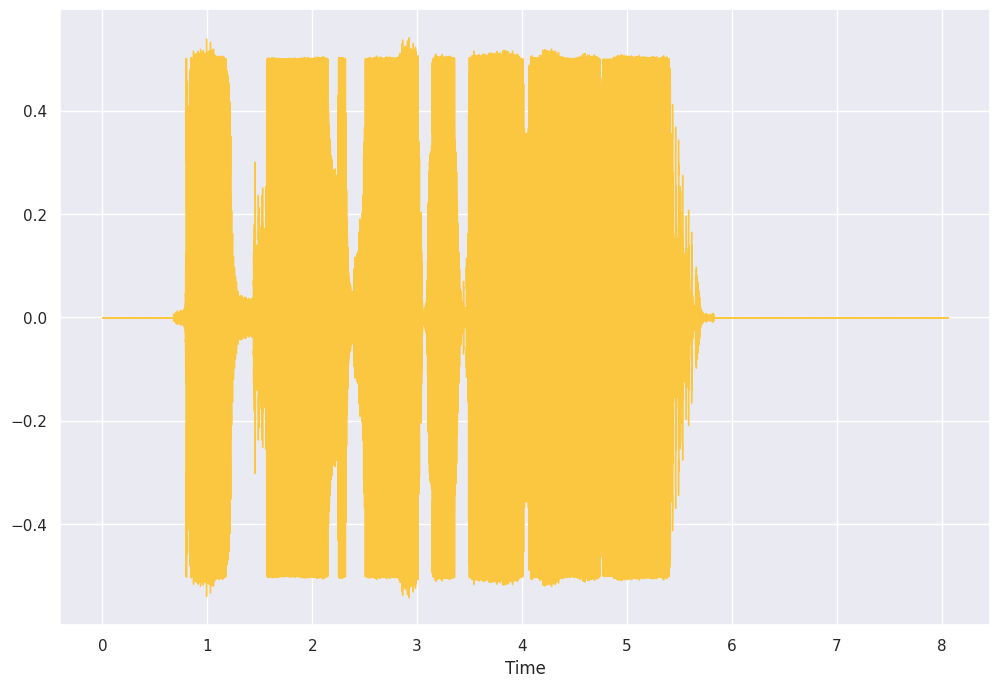

In [18]:
happy = audio_df[audio_df['Label'] == 'HAPPY']['Filepath']
happyarray = audio_df[audio_df['Label'] == 'HAPPY']['Arrays']

librosa.display.waveshow(happyarray.iloc[0], color='#FBC740')
IPython.display.Audio(happy.iloc[0])

# NEUTRAL LABEL

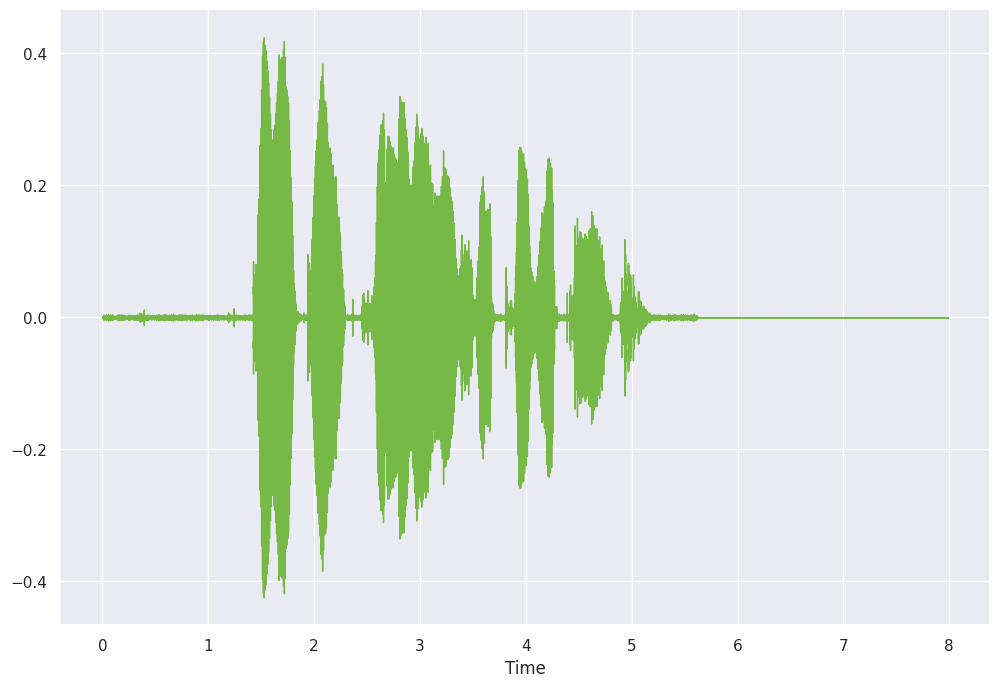

In [19]:
neutral = audio_df[audio_df['Label'] == 'NEUTRAL']['Filepath']
neutralarray = audio_df[audio_df['Label'] == 'NEUTRAL']['Arrays']

librosa.display.waveshow(neutralarray.iloc[0], color='#76B947')
IPython.display.Audio(neutral.iloc[0])

# Data Augmentation

In [20]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps = 4)

# taking any example and checking for techniques.
path = np.array(audio_df.Filepath)[1]
data, sample_rate = librosa.load(path)

# Extracting Features

In [21]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # Duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Without AUGMENTATION
    res1 = extract_features(data)
    result = np.array(res1)
    
    # Data with NOISE
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # Data with NOISE is distinct from data with STRETCHING and PITCHING
    
    # Data with STRETCHING and PITCHING
    new_data = stretch(data, sample_rate)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [22]:
X, Y = [], []
for index, path, emotion in zip(audio_df.Index, audio_df.Filepath, audio_df.Label):
    feature = get_features(path)
    if (index % 100 == 0):
            print("Import Data: RUNNING ... {} files".format(index))
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print(len(X))
print(len(Y))
print(audio_df.Filepath.shape)
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

# Data Preparation and Normalization
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(X.shape)
print(Y.shape)

Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 200 files
Import Data: RUNNING ... 300 files
Import Data: RUNNING ... 400 files
Import Data: RUNNING ... 500 files
Import Data: RUNNING ... 600 files
Import Data: RUNNING ... 700 files
Import Data: RUNNING ... 800 files
Import Data: RUNNING ... 900 files
Import Data: RUNNING ... 1000 files
Import Data: RUNNING ... 1100 files
Import Data: RUNNING ... 1200 files
Import Data: RUNNING ... 1300 files
Import Data: RUNNING ... 1400 files
Import Data: RUNNING ... 1500 files
Import Data: RUNNING ... 1600 files
Import Data: RUNNING ... 1700 files
Import Data: RUNNING ... 1800 files
Import Data: RUNNING ... 1900 files
Import Data: RUNNING ... 2000 files
Import Data: RUNNING ... 2100 files
Import Data: RUNNING ... 2200 files
Import Data: RUNNING ... 2300 files
Import Data: RUNNING ... 2400 files
Import Data: RUNNING ... 2500 files
Import Data: RUNNING ... 2600 files
Import Data: RUNNING ... 2700 files
Impo

# Splitting Dataset

In [23]:
x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.1)

In [24]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((18900, 162), (18900, 7), (2100, 162), (2100, 7))


In [25]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [26]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((18900, 162, 1), (18900, 7), (2100, 162, 1), (2100, 7))


# Model

In [27]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=0.0005),
             metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 160, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 160, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 158, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 158, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 156, 512)       │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 156, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 154, 1024)      │     1,573,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 154, 1024)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 157696)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    80,740,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,972,679 (316.52 MB)

 Trainable params: 82,972,679 (316.52 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/50
  3/148 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.1402 - loss: 9.3624

I0000 00:00:1713940850.638443      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713940850.657013      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.2644 - loss: 2.6185

W0000 00:00:1713940866.071419      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713940866.824802      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 120ms/step - accuracy: 0.2649 - loss: 2.6133 - val_accuracy: 0.4790 - val_loss: 1.3796
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.4625 - loss: 1.3801 - val_accuracy: 0.6000 - val_loss: 1.0629
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5802 - loss: 1.0931 - val_accuracy: 0.6776 - val_loss: 0.8383
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6862 - loss: 0.8529 - val_accuracy: 0.7181 - val_loss: 0.7353
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.7493 - loss: 0.6832 - val_accuracy: 0.7667 - val_loss: 0.6096
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8135 - loss: 0.5077 - val_accuracy: 0.8090 - val_loss: 0.5440
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8707 - loss: 0.3807 - val_accuracy: 0.8543 - val_loss: 0.4507
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8963 - loss: 0.3020 - val_accuracy: 0.8

# Evaluating Model

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


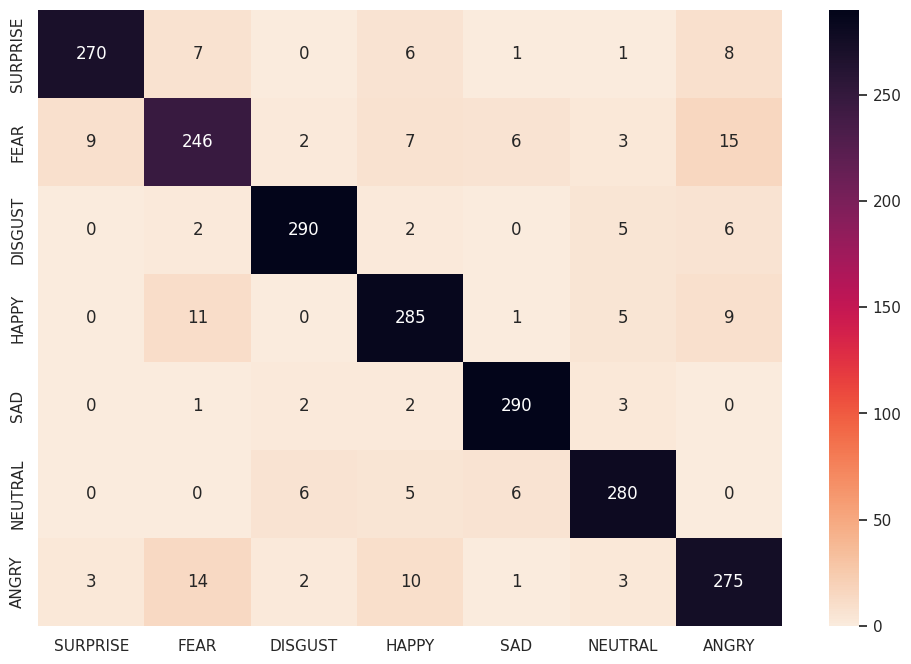

In [29]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, 
                 fmt="d", 
                 cmap = 'rocket_r', 
                 xticklabels = ['SURPRISE', 'FEAR', 'DISGUST', 'HAPPY', 'SAD', 'NEUTRAL', 'ANGRY'], 
                 yticklabels = ['SURPRISE', 'FEAR', 'DISGUST', 'HAPPY', 'SAD', 'NEUTRAL', 'ANGRY'])